<a href="https://colab.research.google.com/github/brijeshahirwar100/ICU-Monitor-Vital-Signs-Extraction-using-Deep-Learning/blob/main/Vital_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the file in your Drive
zip_path = "/content/drive/MyDrive/Vital_Extraction_Project/dataset_images/Cloudphysician.v1i.yolov8.zip"

# Extraction path
extract_path = "/content/Cloudphysician_dataset"
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Unzipped to: /content/Cloudphysician_dataset


In [3]:
!ls /content/Cloudphysician_dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [4]:
# @title
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [5]:
from ultralytics import YOLO

# Load the YOLOv8 nano model (fastest for testing)
model = YOLO('yolov8n.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Train YOLOv8 with fewer epochs
model.train(
    data="/content/Cloudphysician_dataset/data.yaml",
    epochs=5,       # 👈 reduced epochs
    imgsz=320,
    batch=4,
    workers=0,

)
# save the best weights to Drive
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cloudphysician_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.3±7.1 MB/s, size: 48.3 KB)


train: Scanning /content/Cloudphysician_dataset/train/labels... 1400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1400/1400 [00:03<00:00, 422.36it/s]


train: New cache created: /content/Cloudphysician_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 17.9±7.3 MB/s, size: 46.0 KB)


val: Scanning /content/Cloudphysician_dataset/valid/labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<00:00, 489.58it/s]

val: New cache created: /content/Cloudphysician_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      0.671      1.048     0.9941         14        320: 100%|██████████| 350/350 [05:37<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]

                   all        400        400      0.996          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.5196     0.5749     0.9232         13        320: 100%|██████████| 350/350 [05:26<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:38<00:00,  1.31it/s]

                   all        400        400          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.4474     0.4521     0.9066          8        320: 100%|██████████| 350/350 [05:29<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:36<00:00,  1.35it/s]

                   all        400        400          1          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.4101     0.4034     0.8954          8        320: 100%|██████████| 350/350 [05:26<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]

                   all        400        400          1          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.3667     0.3472     0.8873         10        320: 100%|██████████| 350/350 [05:32<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:38<00:00,  1.31it/s]

                   all        400        400          1          1      0.995      0.974



5 epochs completed in 0.512 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]


                   all        400        400          1          1      0.995      0.975
Speed: 0.7ms preprocess, 75.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


In [7]:
from google.colab import files

# Upload image
uploaded = files.upload()


Saving test_img.jpeg to test_img.jpeg



image 1/1 /content/test_img.jpeg: 192x320 1 Health_Monitor, 61.0ms
Speed: 2.4ms preprocess, 61.0ms inference, 1.7ms postprocess per image at shape (1, 3, 192, 320)
✅ Saved cropped image: /content/vitals/crop_0.jpg


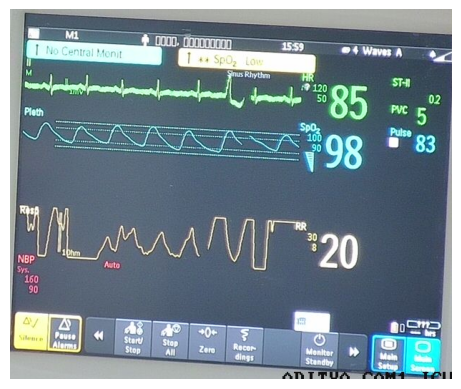

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run detection
results = model.predict(
    source="/content/test_img.jpeg", # Updated filename
    conf=0.5,
    device='cpu' # Explicitly set device to CPU as GPU is not being detected
)

# Create folder for vitals crops
os.makedirs("/content/vitals", exist_ok=True)

# Read original image
orig_img = cv2.imread("/content/test_img.jpeg") # Updated filename

# Loop over detections
for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box[:4])
    crop = orig_img[y1:y2, x1:x2]
    crop_path = f"/content/vitals/crop_{i}.jpg"
    cv2.imwrite(crop_path, crop)
    print(f"✅ Saved cropped image: {crop_path}")

    # Show cropped monitor
    crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    plt.imshow(crop_rgb)
    plt.axis("off")
    plt.show()

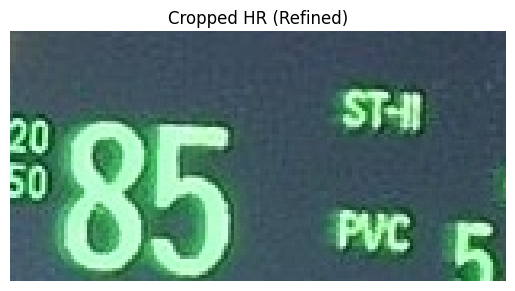

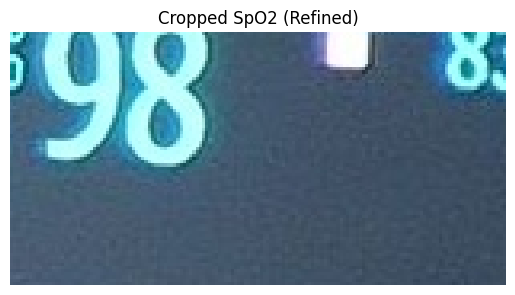

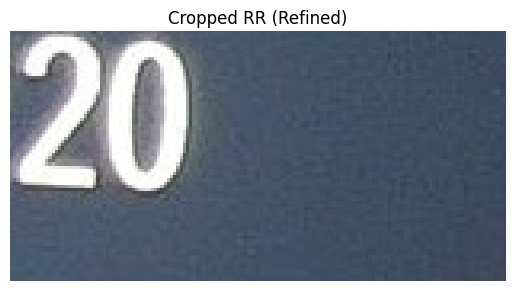

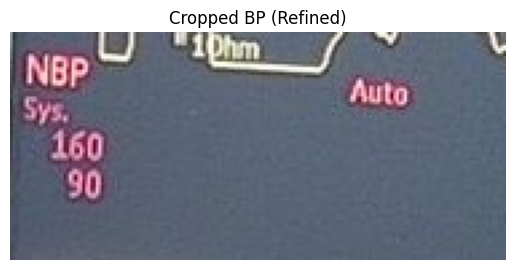

In [9]:
# Load the cropped monitor image
img_path = "/content/vitals/crop_0.jpg"
img = cv2.imread(img_path)

# Dictionary to store cropped vital sign images
cropped_vitals = {}

# Use the refined bounding boxes. Updated BP coordinates based on user feedback.
refined_vital_sign_bboxes = {
    'HR': (431, 78, 586, 156),     # Estimated HR region (from previous steps)
    'SpO2': (431, 182, 586, 261),  # Estimated SpO2 region (from previous steps)
    'RR': (431, 313, 586, 391),    # Estimated RR region (from previous steps)
    'BP': (5, 335, 190, 420)     # Refined BP region based on user feedback
}


# Iterate through the refined bounding boxes and crop each vital sign region
for vital, bbox in refined_vital_sign_bboxes.items():
    x1, y1, x2, y2 = bbox
    # Ensure coordinates are within image bounds
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(img.shape[1], x2)
    y2 = min(img.shape[0], y2)

    # Crop the image
    cropped_img = img[y1:y2, x1:x2]

    # Check if the cropped image is not empty before storing and displaying
    if not cropped_img is None and cropped_img.shape[0] > 0 and cropped_img.shape[1] > 0:
        cropped_vitals[vital] = cropped_img
        # Display each cropped vital sign image
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Cropped {vital} (Refined)")
        plt.show()
    else:
        print(f"Warning: Cropped image for {vital} is empty or invalid with refined coordinates.")

In [12]:
!pip install pytesseract

In [17]:
!pip install easyocr paddleocr paddlepaddle

In [28]:
import re

# Dictionary to store extracted vital sign values
extracted_text = {}
final_vitals = {}

# Initialize EasyOCR reader
easy_reader = easyocr.Reader(['en'])

# Define patterns for vital signs
# These patterns are basic and might need refinement based on the specific display
vital_patterns = {
    'HR': r'\d+',        # Looks for one or more digits
    'SpO2': r'\d+',      # Looks for one or more digits
    'RR': r'\d+',        # Looks for one or more digits
    'BP': r'\d+/\d+|\d+' # Looks for SYS/DIA or a single number
}

print("Performing OCR and extracting vital signs...")

for vital, cropped_img in cropped_vitals.items():
    # Convert the image to grayscale if it's not already
    if len(cropped_img.shape) == 3:
        cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    else:
        cropped_img_gray = cropped_img

    # Apply EasyOCR
    result = easy_reader.readtext(cropped_img_gray, detail=0) # detail=0 returns only text
    extracted_text[vital] = " ".join(result) # Join all detected text

    # Extract vital value using regex
    detected_value = None
    if vital in vital_patterns:
        pattern = vital_patterns[vital]
        match = re.search(pattern, extracted_text[vital])
        if match:
            detected_value = match.group(0)

    final_vitals[vital] = detected_value

    print(f"{vital}: Raw OCR -> '{extracted_text[vital]}', Extracted Value -> '{final_vitals[vital]}'")

print("\n--- Final Extracted Vitals ---")
for vital, value in final_vitals.items():
    if value:
        print(f"{vital}: {value}")
    else:
        print(f"{vital}: Not detected")

Performing OCR and extracting vital signs...
HR: Raw OCR -> 'STI 85 PVc 5', Extracted Value -> '85'
SpO2: Raw OCR -> ''98', Extracted Value -> '98'
RR: Raw OCR -> '20', Extracted Value -> '20'
BP: Raw OCR -> 'Kiphm NBP 160 Auto', Extracted Value -> '160'

--- Final Extracted Vitals ---
HR: 85
SpO2: 98
RR: 20
BP: 160


In [29]:
import cv2, re, easyocr

reader = easyocr.Reader(['en'])
final_vitals = {}
patterns = {'HR': r'\d+', 'SpO2': r'\d+', 'RR': r'\d+', 'BP': r'\d+/\d+|\d+'}

for vital, img in cropped_vitals.items():
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
    text = " ".join(reader.readtext(gray, detail=0))
    matches = re.findall(patterns[vital], text)
    if matches:
        if vital == "BP" and len(matches) >= 2 and "/" not in matches[0]:
            final_vitals[vital] = f"{matches[0]}/{matches[1]}"
        else:
            final_vitals[vital] = matches[0]
    else:
        final_vitals[vital] = None
    print(f"{vital}: {final_vitals[vital]} (Raw: {text})")

print("\n--- Final Extracted Vitals ---")
for k, v in final_vitals.items():
    print(f"{k}: {v if v else 'Not detected'}")


HR: 85 (Raw: STI 85 PVc 5)
SpO2: 98 (Raw: '98)
RR: 20 (Raw: 20)
BP: 160 (Raw: Kiphm NBP 160 Auto)

--- Final Extracted Vitals ---
HR: 85
SpO2: 98
RR: 20
BP: 160


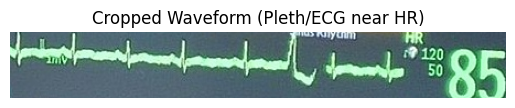

In [48]:
# Define bounding box for the waveform near HR (estimated based on the provided image)
# This is likely the Pleth waveform, often displayed with HR
ecg_bbox = (50, 90, 500, 150)  # Updated example coordinates for the waveform near HR (Pleth/ECG)

# Load the cropped monitor image (assuming it's saved as /content/vitals/crop_0.jpg)
monitor_img_path = "/content/vitals/crop_0.jpg"
monitor_img = cv2.imread(monitor_img_path)

# Ensure the monitor image was loaded successfully
if monitor_img is None:
    print(f"Error: Could not load monitor image from {monitor_img_path}")
else:
    # Extract the waveform region using the defined bounding box
    x1, y1, x2, y2 = ecg_bbox

    # Ensure coordinates are within image bounds
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(monitor_img.shape[1], x2)
    y2 = min(monitor_img.shape[0], y2)

    ecg_crop = monitor_img[y1:y2, x1:x2]

    # Display the cropped waveform graph
    if not ecg_crop is None and ecg_crop.shape[0] > 0 and ecg_crop.shape[1] > 0:
        plt.imshow(cv2.cvtColor(ecg_crop, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Cropped Waveform (Pleth/ECG near HR)") # Updated title
        plt.show()

        # You can optionally save the cropped waveform image
        # cv2.imwrite("/content/vitals/waveform_near_hr.jpg", ecg_crop)
        # print("✅ Saved cropped waveform near HR: /content/vitals/waveform_near_hr.jpg")
    else:
        print("Warning: Cropped image for waveform near HR is empty or invalid with the defined coordinates.") # Updated message

In [49]:
from google.colab import files

# Upload image
uploaded = files.upload()


Saving test_vid.mp4 to test_vid.mp4


In [54]:
import cv2
import os
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Open video
video_path = "/content/test_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get FPS to calculate 10 seconds limit
fps = int(cap.get(cv2.CAP_PROP_FPS))
max_frames = fps * 10   # 10 sec worth frames

# Output folder
os.makedirs("/content/vitals_frames", exist_ok=True)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1

    # Stop after 10 seconds worth of frames
    if frame_count > max_frames:
        break

    # Run detection on frame
    results = model.predict(frame, conf=0.5, device='cpu', verbose=False)

    # Crop detected monitors
    for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box[:4])
        crop = frame[int(y1):int(y2), int(x1):int(x2)]
        crop_path = f"/content/vitals_frames/frame{frame_count}_crop{i}.jpg"
        cv2.imwrite(crop_path, crop)
        print(f"✅ Saved: {crop_path}")

cap.release()
print("✅ Processed only first 10 seconds, crops saved in /content/vitals_frames")

✅ Saved: /content/vitals_frames/frame1_crop0.jpg
✅ Saved: /content/vitals_frames/frame2_crop0.jpg
✅ Saved: /content/vitals_frames/frame3_crop0.jpg
✅ Saved: /content/vitals_frames/frame4_crop0.jpg
✅ Saved: /content/vitals_frames/frame5_crop0.jpg
✅ Saved: /content/vitals_frames/frame6_crop0.jpg
✅ Saved: /content/vitals_frames/frame7_crop0.jpg
✅ Saved: /content/vitals_frames/frame8_crop0.jpg
✅ Saved: /content/vitals_frames/frame9_crop0.jpg
✅ Saved: /content/vitals_frames/frame10_crop0.jpg
✅ Saved: /content/vitals_frames/frame11_crop0.jpg
✅ Saved: /content/vitals_frames/frame12_crop0.jpg
✅ Saved: /content/vitals_frames/frame13_crop0.jpg
✅ Saved: /content/vitals_frames/frame14_crop0.jpg
✅ Saved: /content/vitals_frames/frame15_crop0.jpg
✅ Saved: /content/vitals_frames/frame16_crop0.jpg
✅ Saved: /content/vitals_frames/frame17_crop0.jpg
✅ Saved: /content/vitals_frames/frame18_crop0.jpg
✅ Saved: /content/vitals_frames/frame19_crop0.jpg
✅ Saved: /content/vitals_frames/frame20_crop0.jpg
✅ Saved: 

In [55]:
import cv2, re, easyocr
from ultralytics import YOLO

# Load YOLO + OCR
model = YOLO("/content/runs/detect/train/weights/best.pt")
reader = easyocr.Reader(['en'])

# Region mapping (relative coords: x1%, y1%, x2%, y2%)
regions = {
    "HR":   (0.70, 0.05, 0.95, 0.20),
    "SpO2": (0.70, 0.20, 0.95, 0.35),
    "RR":   (0.70, 0.35, 0.95, 0.50),
    "BP":   (0.05, 0.35, 0.30, 0.50)
}

patterns = {
    "HR": r"\b\d{2,3}\b",
    "SpO2": r"\b\d{2,3}\b",
    "RR": r"\b\d{1,2}\b",
    "BP": r"\b\d{2,3}/\d{2,3}\b"
}

cap = cv2.VideoCapture("/content/test_video.mp4")
fps = int(cap.get(cv2.CAP_PROP_FPS))
max_frames = fps * 10

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret or frame_count >= max_frames:
        break
    frame_count += 1
    if frame_count % 10 != 0:  # skip frames for speed
        continue

    results = model.predict(frame, conf=0.5, device='cpu', verbose=False)
    if len(results[0].boxes) == 0:
        continue

    # biggest monitor box
    boxes = results[0].boxes.xyxy.cpu().numpy()
    areas = [(x2-x1)*(y2-y1) for x1,y1,x2,y2 in boxes]
    idx = areas.index(max(areas))
    x1,y1,x2,y2 = map(int, boxes[idx])
    monitor = frame[y1:y2, x1:x2]

    # Extract vitals by region
    vitals = {}
    h, w = monitor.shape[:2]
    for vital, (rx1, ry1, rx2, ry2) in regions.items():
        cx1, cy1, cx2, cy2 = int(rx1*w), int(ry1*h), int(rx2*w), int(ry2*h)
        crop = monitor[cy1:cy2, cx1:cx2]

        text = " ".join(reader.readtext(crop, detail=0))
        match = re.search(patterns[vital], text)
        vitals[vital] = match.group(0) if match else None

    print(f"\nFrame {frame_count}/{max_frames}")
    print("Extracted Vitals:", vitals)

cap.release()
print("✅ Processed first 10 sec with region-wise OCR")


Frame 10/300
Extracted Vitals: {'HR': None, 'SpO2': '04', 'RR': None, 'BP': None}

Frame 20/300
Extracted Vitals: {'HR': '60', 'SpO2': '04', 'RR': '66', 'BP': None}

Frame 30/300
Extracted Vitals: {'HR': '04', 'SpO2': '083', 'RR': '00', 'BP': None}

Frame 40/300
Extracted Vitals: {'HR': '04', 'SpO2': '034', 'RR': '00', 'BP': None}

Frame 50/300
Extracted Vitals: {'HR': '04', 'SpO2': '091', 'RR': '00', 'BP': None}

Frame 60/300
Extracted Vitals: {'HR': '04', 'SpO2': '00', 'RR': '00', 'BP': None}

Frame 70/300
Extracted Vitals: {'HR': '04', 'SpO2': '09', 'RR': '00', 'BP': None}

Frame 80/300
Extracted Vitals: {'HR': '00', 'SpO2': '04', 'RR': '00', 'BP': None}

Frame 90/300
Extracted Vitals: {'HR': '12', 'SpO2': '04', 'RR': None, 'BP': None}

Frame 100/300
Extracted Vitals: {'HR': None, 'SpO2': '085', 'RR': '00', 'BP': None}

Frame 110/300
Extracted Vitals: {'HR': '00', 'SpO2': '074', 'RR': '00', 'BP': None}

Frame 120/300
Extracted Vitals: {'HR': '09', 'SpO2': '10', 'RR': '00', 'BP': No